# Robot-run cafe

## Having the data on establishments in LA, prepare a market reseach in order to attract investors for the small robot-run cafe.

1. [Opening data](#start)
2. [Preprocessing data](#preprocessing)
    * [Processing missing values](#null)
    * [Processing duplicate data/data types](#duplicates) 
    * [Conclusion](#conclusion)<br>
3.[Data analysing](#analysing)
    * [Investigate the proportions of the various types of establishments](#proportionstype)
    * [Investigate the proportions of chain and nonchain establishments.](#proportionschain)
    * [Which type of establishment is typically a chain?](#typicallychain)
    * [What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#characterizechains)
    * [Determine the average number of seats for each type of establishment. On average, which type of establishment has the greatest number of seats?](#averagefortype)
    * [Put the data on street names from the address column in a separate column.](#separate)
    * [Plot a graph of the top ten streets by number of establishments.](#topten)
    * [Find the number of streets that only have one establishment.](#onlyone)
    * [For streets with a lot of establishments, look at the distribution of the number of seats. What trends can you see?](#trends)
   


## General conclusion <a id="general"></a>

As a conclusion we can say the following :<br>
    * when it comes to the type of the establishment the best options are restaurant, fast food or cafe;
    * the establishment should be part of a chain with less than 20 establishments;
    * it is better not to have more than 50 seats in the establishment;
    * the best place for the establishment should also be on the top ten streets( Sunset, Wilshire, Pico ..);

The goal of the project is to find out if opening a robot-run cafe in LA is a good choice or not and also how(part of a chain or not) and where it should be located. 

## Opening data <a id="start"></a>

In [1]:
!pip install usaddress

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 63 kB 781 kB/s eta 0:00:011
     |████████████████████████████████| 743 kB 1.8 MB/s eta 0:00:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import usaddress

In [3]:
path ='/datasets/'
restaurants = pd.read_csv(path + 'rest_data_us.csv')

In [4]:
display(restaurants.head(20))
display(restaurants.info())

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None

The data provided has informations about different establishments from LA. There is the id of each establishment, the type, the name and the address of the establishment. Also there are the numbers of seats and the information if an establishment is a chain or not.

## Preprocessing data <a id ="preprocessing"></a>

### Processing missing values <a id="null"></a>

In [5]:
restaurants.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [6]:
restaurants[restaurants['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [7]:
restaurants['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

In [8]:
restaurants[restaurants['object_type']=='Restaurant']['chain'].value_counts()
restaurants[restaurants['object_type']=='Pizza']['chain'].value_counts()

restaurants[restaurants['object_name'].str.contains("JAMMIN")]

restaurants[restaurants['object_name'].str.contains("TAQUERIA ")]

restaurants[restaurants['object_name'].str.contains("THEATER")]

restaurants =restaurants.fillna('False')
restaurants.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

The dataset had 3 missing values in the chain column. The name of the objects for those chains is unique and other objects containing parts of that name were having ( most of them ) False values in the chain column so that's the reason for filling the missing values with 'False'. 

### Processing duplicate data / data types <a id="duplicates"></a>

In [9]:
restaurants.duplicated().sum()

0

In [10]:
restaurants.loc[restaurants['object_name'].str.contains('SUBWAY', case=False),'object_name']='SUBWAY'
restaurants.loc[restaurants['object_name'].str.contains("WABA GRILL", case=False),'object_name']="WABA GRILL"
restaurants.loc[restaurants['object_name'].str.contains("KENTUCKY FRIED CHICKEN", case=False),'object_name']="KENTUCKY FRIED CHICKEN"
restaurants.loc[restaurants['object_name'].str.contains("TRIMANA", case=False),'object_name']="TRIMANA"
restaurants.loc[restaurants['object_name'].str.contains("MCDONALD'S", case=False),'object_name']="MCDONALD'S"
restaurants.loc[restaurants['object_name'].str.contains("PAPA JOHN'S PIZZA", case=False),'object_name']="PAPA JOHN'S PIZZA"
restaurants.loc[restaurants['object_name'].str.contains("YOGURTLAND", case=False),'object_name']="YOGURTLAND"
restaurants.loc[restaurants['object_name'].str.contains("HONG KONG EXPRESS",case=False),'object_name']="HONG KONG EXPRESS"
restaurants.loc[restaurants['object_name'].str.contains("EL POLLO LOCO",case=False),'object_name']="EL POLLO LOCO"
restaurants.loc[restaurants['object_name'].str.contains("STARBUCKS",case=False),'object_name']="STARBUCKS"
restaurants.loc[restaurants['object_name'].str.contains("CHIPOTLE MEXICAN GRILL",case=False),'object_name']="CHIPOTLE MEXICAN GRILL"
restaurants.loc[restaurants['object_name'].str.contains("WINGSTOP",case=False),'object_name']="WINGSTOP"
restaurants.loc[restaurants['object_name'].str.contains("LOUISIANA FRIED CHICKEN",case=False),'object_name']="LOUISIANA FRIED CHICKEN"
restaurants.loc[restaurants['object_name'].str.contains("KFC",case=False),'object_name']="KFC"
restaurants.loc[restaurants['object_name'].str.contains("CARL'S JR",case=False),'object_name']="CARL'S JR"
restaurants.loc[restaurants['object_name'].str.contains("JERSEY MIKE'S SUBS",case=False),'object_name']="JERSEY MIKE'S SUBS"
restaurants.loc[restaurants['object_name'].str.contains("BASKIN ROBBINS",case=False),'object_name']="BASKIN ROBBINS"
restaurants.loc[restaurants['object_name'].str.contains("PINKBERRY",case=False),'object_name']="PINKBERRY"
restaurants.loc[restaurants['object_name'].str.contains("CHINA EXPRESS",case=False),'object_name']="CHINA EXPRESS"
restaurants.loc[restaurants['object_name'].str.contains("FATBURGER",case=False),'object_name']="FATBURGER"
restaurants.loc[restaurants['object_name'].str.contains("CHINATOWN EXPRESS",case=False),'object_name']="CHINATOWN EXPRESS"
restaurants.loc[restaurants['object_name'].str.contains("PANDA EXPRESS",case=False),'object_name']="PANDA EXPRESS"
restaurants.loc[restaurants['object_name'].str.contains("LITTLE CAESARS",case=False),'object_name']="LITTLE CAESARS"
restaurants.loc[restaurants['object_name'].str.contains("TACO BELL",case=False),'object_name']="TACO BELL"
restaurants.loc[restaurants['object_name'].str.contains("MENDOCINO FARMS",case=False),'object_name']="MENDOCINO FARMS"

restaurants['object_name'].value_counts().head(35)

SUBWAY                        152
STARBUCKS                     129
MCDONALD'S                     82
THE COFFEE BEAN & TEA LEAF     47
EL POLLO LOCO                  38
TACO BELL                      31
TRIMANA                        27
PANDA EXPRESS                  25
CARL'S JR                      24
YOGURTLAND                     21
LOUISIANA FRIED CHICKEN        20
BASKIN ROBBINS                 19
CHIPOTLE MEXICAN GRILL         19
KENTUCKY FRIED CHICKEN         17
WABA GRILL                     16
HONG KONG EXPRESS              16
WINGSTOP                       15
DOMINO'S PIZZA                 15
KFC                            14
PAPA JOHN'S PIZZA              14
LITTLE CAESARS                 14
CHINATOWN EXPRESS              12
PINKBERRY                      12
JERSEY MIKE'S SUBS             11
CHINA EXPRESS                  11
FATBURGER                      11
BLUE BOTTLE COFFEE              9
POLLO CAMPERO                   6
WETZEL'S PRETZELS               6
MENDOCINO FARM

Now we get rid of most of the duplicates.

In [11]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9651 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [12]:
restaurants['chain'] = restaurants['chain'].astype('bool')
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9651 non-null bool
object_type    9651 non-null object
number         9651 non-null int64
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


The dataset has no duplicates and since the chain column has only True and False values we changed the data type to boolean.

#### Now that the dataset has no duplicates, no missing values and the data types are correct, we are ready to analyse the data.<a id="conclusion"><a/>

## Data analysing <a id="analysing"><a/>

### Investigate the proportions of the various types of establishments <a id="proportionstype"><a/> 

In [13]:
total_types = restaurants['object_type'].count()
print(total_types)
restaurants['object_type'].value_counts()

9651


Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

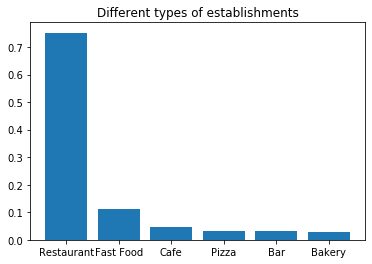

In [14]:
rest_restaurant = restaurants[restaurants['object_type']=='Restaurant']['object_type'].count()
rest_fastfood = restaurants[restaurants['object_type']=='Fast Food']['object_type'].count()
rest_cafe = restaurants[restaurants['object_type']=='Cafe']['object_type'].count()
rest_pizza = restaurants[restaurants['object_type']=='Pizza']['object_type'].count()
rest_bar = restaurants[restaurants['object_type']=='Bar']['object_type'].count()
rest_bakery = restaurants[restaurants['object_type']=='Bakery']['object_type'].count()

rest_obj = [rest_restaurant/total_types, rest_fastfood/total_types, rest_cafe/total_types, rest_pizza/total_types, rest_bar/total_types, rest_bakery/total_types]
rest_name = ['Restaurant', 'Fast Food','Cafe','Pizza','Bar','Bakery']
plt.bar(rest_name, rest_obj)
plt.title('Different types of establishments');

Restaurants are the most popular establishments with 70% from the total and maybe that's because it is a more complex establishment than the others.There is diversity,the estabishment having both food,drinks and sweets.Then is followed by Fast Food with only 10% and the rest of the establishments not being more than 10%.

### Investigate the proportions of chain and nonchain establishments <a id="proportionschain"><a/>

3679

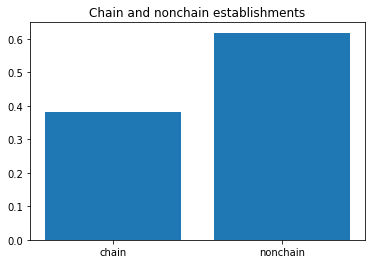

In [15]:
total_chains = restaurants['chain'].count()

rest_chain = restaurants[restaurants['chain']==1]['chain'].count()
rest_nonchain = restaurants[restaurants['chain']==0]['chain'].count()

rest_chains = ['chain','nonchain']
rest_chain_nr =[rest_chain/total_chains, rest_nonchain/total_chains]

plt.bar(rest_chains, rest_chain_nr);
plt.title('Chain and nonchain establishments');
rest_chain

There are much more nonchain than chain establishments, the nonchain values being almost doubled the chain values and maybe that's because it is a big city with a variaty of cultures and nonchain establishments are having succes for their authenticity and unicity. 

### Which type of establishment is typically a chain? <a id ="typicallychain"><a/>

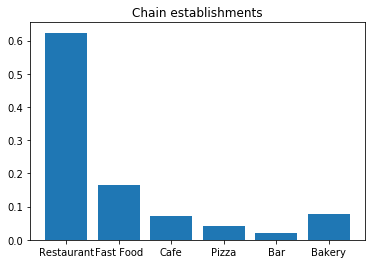

In [16]:
total_type_rest = restaurants[restaurants['chain']==1]['object_type'].count()

type_rest = restaurants[(restaurants['chain']==1) & (restaurants['object_type']=='Restaurant')]['object_type'].count()
type_fastfood = restaurants[(restaurants['object_type']=='Fast Food')&(restaurants['chain']==1)]['object_type'].count()
type_cafe = restaurants[(restaurants['object_type']=='Cafe')&(restaurants['chain']==1)]['object_type'].count()
type_pizza = restaurants[(restaurants['object_type']=='Pizza')&(restaurants['chain']==1)]['object_type'].count()
type_bar = restaurants[(restaurants['object_type']=='Bar')&(restaurants['chain']==1)]['object_type'].count()
type_bakery = restaurants[(restaurants['object_type']=='Bakery')&(restaurants['chain']==1)]['object_type'].count()

type_chains = ['Restaurant','Fast Food', 'Cafe', 'Pizza', 'Bar','Bakery']
chains_nr = [type_rest/total_type_rest, type_fastfood/total_type_rest, type_cafe/total_type_rest, type_pizza/total_type_rest, type_bar/total_type_rest, type_bakery/total_type_rest]

plt.bar(type_chains, chains_nr);
plt.title('Chain establishments');

Restaurant is also the most popular in chain establishments followed with way lower values by fast food and bakery.

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? <a id="characterizechains"><a/>

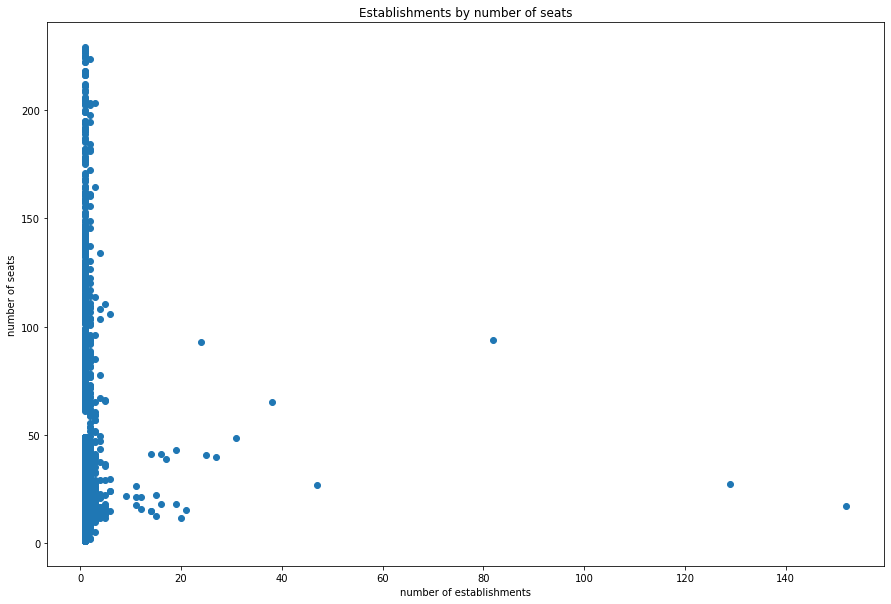

In [17]:
fig, test = plt.subplots()
name_chain = restaurants[restaurants['chain']==1].groupby('object_name')['object_name'].count()
number_seats = restaurants[restaurants['chain']==1].groupby('object_name')['number'].mean()
test.scatter(name_chain,number_seats)
test.set_title('Establishments by number of seats');
test.set_xlabel('number of establishments');
test.set_ylabel('number of seats');

fig.set_figheight(10);
fig.set_figwidth(15);


The majority of the chains have few establishments with usually less than 50 seats. It also can be seen that chains with many establishments have also less than 50 seats which means that both chains are focusing on less seats for the establishments.

### Determine the average number of seats for each type of establishment. On average, which type of establishment has the greatest number of seats? <a id="averagefortype"></a>

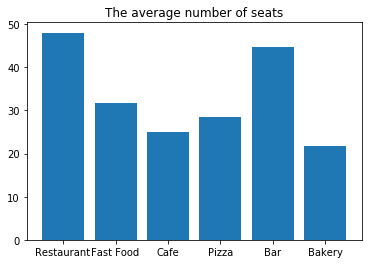

In [18]:
avg_for_type = restaurants.groupby('object_type', as_index=False).agg({'number':'mean'})
avg_for_type.columns =['object','mean']
#display(avg_for_type)

avg_rest = restaurants[restaurants['object_type']=='Restaurant']['number'].mean()
avg_fastfood = restaurants[restaurants['object_type']=='Fast Food']['number'].mean()
avg_cafe = restaurants[(restaurants['object_type']=='Cafe')]['number'].mean()
avg_pizza = restaurants[(restaurants['object_type']=='Pizza')]['number'].mean()
avg_bar = restaurants[(restaurants['object_type']=='Bar')]['number'].mean()
avg_bakery = restaurants[(restaurants['object_type']=='Bakery')]['number'].mean()

avg_for_type_2 =(avg_rest, avg_fastfood, avg_cafe, avg_pizza, avg_bar, avg_bakery)
type_chains_2 = ['Restaurant','Fast Food', 'Cafe', 'Pizza', 'Bar','Bakery']

plt.bar(type_chains_2, avg_for_type_2);
plt.title('The average number of seats');

Restaurant and Bar have the greatest number of seats, almost 50 seats and that's kind of normal because these are the estabishments where the majority of clients like to spend a lot of time in there so more seats means more incomes. For the rest of the establishments with less than 30 seats maybe having not so many seats is not affecting the income because clients are not spending much time in there.

### Put the data on street names from the address column in a separate column. <a id="separate"></a>

In [1]:
def cleaning_1(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
    return clean_adress

def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
     
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

restaurants['clean_street_check'] = restaurants.address.apply(cleaning_check)
restaurants[restaurants['clean_street_check']=='no street or number']
    
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='LOS ANGELES ST'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=str(dict_address['StreetName'])
    return clean_adress

restaurants['street_name']=restaurants.address.apply(cleaning_final)
restaurants

NameError: name 'restaurants' is not defined

### Plot a graph of the top ten streets by number of establishments.<a id="topten"></a>

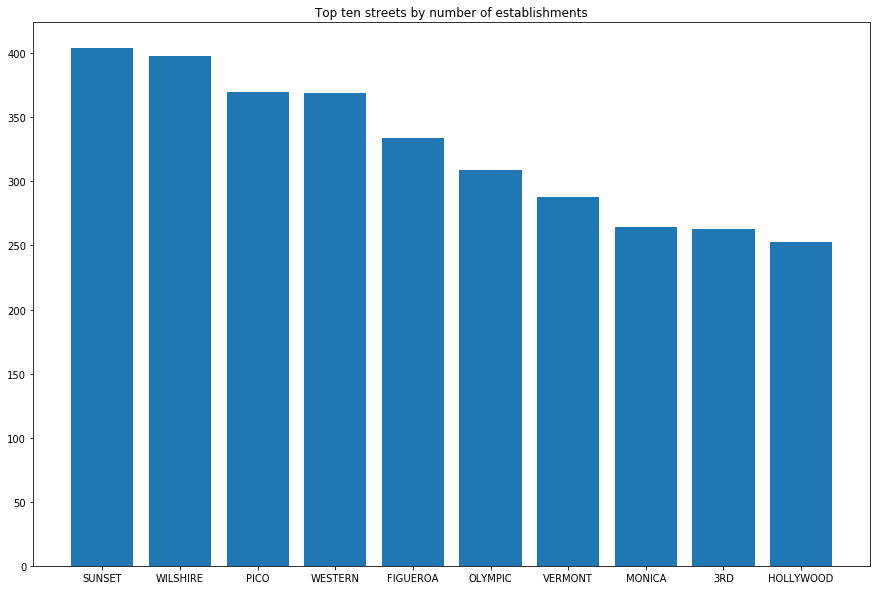

In [20]:
top_ten = restaurants.groupby("street_name", as_index=False).agg({'object_name':'count'}).sort_values(by='object_name',ascending=False)
top_ten.columns =['street_name','nr_rest']
f,ax=plt.subplots()
plt.bar(top_ten['street_name'].head(10),top_ten['nr_rest'].head(10));
f.set_figheight(10);
f.set_figwidth(15);
plt.title('Top ten streets by number of establishments');

The top ten streets have more than 200 establishments, the one on the top having around 400 establishments and that's because these streets are very famous and popular all over the world and so frequented by a lot of people . That's a lot and maybe it is better to open an establishment on one of these streets because these are the most popular and frequented streets but it should be taken into consideration that the competition is very high.

### Find the number of streets that only have one establishment.<a id="onlyone"></a>

In [21]:
one_estab = top_ten[top_ten['nr_rest']==1]['street_name'].value_counts()
display(one_estab.head(10))
one_estab.count()

SIFFORD       1
NORTON        1
LA            1
TAMPA         1
GARDNER       1
TOWNSEND      1
VENTURA       1
ALTURA        1
2             1
ENTERPRISE    1
Name: street_name, dtype: int64

185

Seems like there are a lot of streets with only one establishment maybe because these are not so popular streets,small, and maybe out of town and the flow of people is not that high. So we could take these streets in consideration when building the estabishment because the competition is not that high but there are less chances to gain popularity.

### For streets with a lot of establishments, look at the distribution of the number of seats. What trends can you see?<a id="trends"></a>

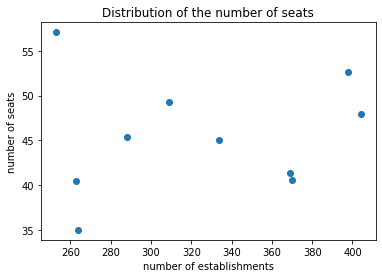

In [22]:
distr_top =restaurants.groupby("street_name", as_index=False).agg({'object_name':'count','number':'mean'}).sort_values(by='object_name',ascending=False).head(10)
fig2,test2 = plt.subplots()
test2.scatter(distr_top['object_name'],distr_top['number']);
test2.set_title('Distribution of the number of seats');
test2.set_xlabel('number of establishments');
test2.set_ylabel('number of seats');

The average values range from 30 to 60 seats for streets with many establishments.It seems like the focus is not on big number of seats but maybe on delivery service, reducing the costs .

Conclusion :<br>
    The most popular establishment in LA is the restaurant, followed by fast-food and cafe;<br>
    There are significantly more nonchain than chain establishments;<br>
    The restaurants are typically a chain, not saying the same about cafe;<br>
    Usually chain establishments have, on average, maximum 50 seats;<br> 
    The number of seats depends on how complex an establishment is so only bars and restaurants have bigger numbers of seats;<br>
    More establishments can be found on popular and big streets and usually small and bad located streets don't have more than one establishment;<br>

Having these results, the idea of a small Robot-Run Cafe doesn't sound bad and we can attract investors as long as we take the following suggestions into account: <br>
    Cafe is in top 3 most popular establishments and if we choose the nonchain type than we won't have much costs and we won't need much money from the investors(which is also perfect for the investors);<br>
    Also a cafe is not a complex establishment so not so many seats are needed;<br>
    The location is also very important so the top 10 streets by the number of establishments are the best places to think of;

Presentation : <https://drive.google.com/file/d/1C9b599Kb9SzgSwCroQSZiWwp10xEs-LA/view?usp=sharing> 